# TFM: ANÁLISIS PREDICTIVO EN EL SECTOR FINANCIERO. Desarrollado por Jorge Ruiz Rico. 

## Ingesta y limpieza de los datos

## Resumen

Este notebook contiene la primera parte de la resolución del proyecto. Es un parte esencial que va desde la ingesta de los datos desde una base de datos de Kaggle, hata su limpieza y preparación para dividirlos en datos de test y validación.

El primer paso tras descargarse los datos, será revisarlos para buscar filas de datos corruptas (con valores NaN o vacíos) para decidir si se corrigen de alguna manera o se eliminan esas filas. 

Una vez garantizada la integridad de la base de datos, se separaran en test y validación y se almacenanrán en la carpeta correspondiente para su posterior uso en el notebook encargado de entrenar el modelo que se diseñe.


In [9]:
import pandas as pd
import opendatasets as od
import os

# Directorio de trabajo actual
current_directory = os.getcwd()
directory = os.path.join(current_directory, 'yahoo-finance-dataset-2018-2023')

if not os.path.exists(directory):
    od.download("https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023")
else:
    print("Dataset ya descargado")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  jorgeruri


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/suruchiarora/yahoo-finance-dataset-2018-2023


100%|██████████████████████████████████████████████████████████████████████████████| 77.5k/77.5k [00:00<00:00, 352kB/s]

Una vez que se tiene preparado el dataset, lo primero de todos es realizar un análisis exploratorio de los datos (EDA). Este paso es de vital importancia porque permitirá entender mejor como vienen estructurados los datos y su contenido. Se verificarán valores faltantes, se realizarán estadísticas descriptivas y distribuciones.

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Primero cargamos los datos del dataset que hemos descargado de Kaggle
print(directory)
os.chdir(directory)
print(os.listdir(directory))
df = pd.read_excel("yahoo_data.xlsx")
df.shape

# separamos entre columnas numéricas y categóricas
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

# Inspección inicial del DataFrame
print(df.head())
print(df.info())
print(df.describe())

# Verificación de valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes:\n", missing_values)

C:\Users\jorge\Escritorio\TFM\yahoo-finance-dataset-2018-2023\yahoo-finance-dataset-2018-2023
['yahoo_data.xlsx']
           Date      Open      High       Low    Close*  Adj Close**  \
0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   

      Volume  
0  354310000  
1  343240000  
2  321170000  
3  297880000  
4  252020000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   

Aunque al ser un dataset público, ya son publicados sin nigún tipo de fila corrupta o dato nulo. Aún así, tener esta capa de preprocesamiento hace que el código desarrollado sea mucho más robusto.

Analizando los resultados de esta sección del codigo vemos que el dataframe contiene los siguientes campos:

- **Date**: fecha dl registro
- **Open**: precio de apertura
- **High**: precio más alto del día
- **Low**: precio más bajo del día
- **Close**: precio de cierre
- **Adj Close**: precio de cierre ajustado
- **Volume**: volumen de acciones negociadas

Por otro lado, tambien hemos sacado la estructura del dataframe que nos porporciona información realmente útil:

- Hay 1258 registros (filas).
- Hay 7 columnas: Date, Open, High, Low, Close*, Adj Close**, Volume.
- No hay valores faltantes en ninguna de las columnas.
- Las columnas Open, High, Low, Close*, Adj Close** son de tipo float64 (números decimales).
- La columna Volume es de tipo int64 (enteros).
- La columna Date es de tipo object (cadena de texto), la cual convertiremos a datetime más adelante.

En cuanto a las estadísticas obtenidas, proporcionan la siguiente información:

- **mean (media)**: Promedio de los valores.
- **std (desviación estándar)**: Mide la dispersión de los valores.
- **min (mínimo)**: Valor más bajo.
- **25% (primer cuartil)**: Valor debajo del cual cae el 25% de los datos.
- **50% (mediana)**: Valor central de los datos.
- **75% (tercer cuartil)**: Valor debajo del cual cae el 75% de los datos.
- **max (máximo)**: Valor más alto.

Por último, vemos claramente como ninguna de las columnas presenta valores faltantes.

Analizando estos resultados, vemos como la columna Date, debe ser convertida al formato 'datetime' para facilitar el análisis de series temporales. El resto de columnas presenta un formato adecuado para trabajar con ellas.
Las estadísticas, por otro lado, muestran que los precios de las acciones y el volumen tienen una distribución razonable con valores mínimos y máximos que parecen consistentes con la realidad del mercado bursátil.


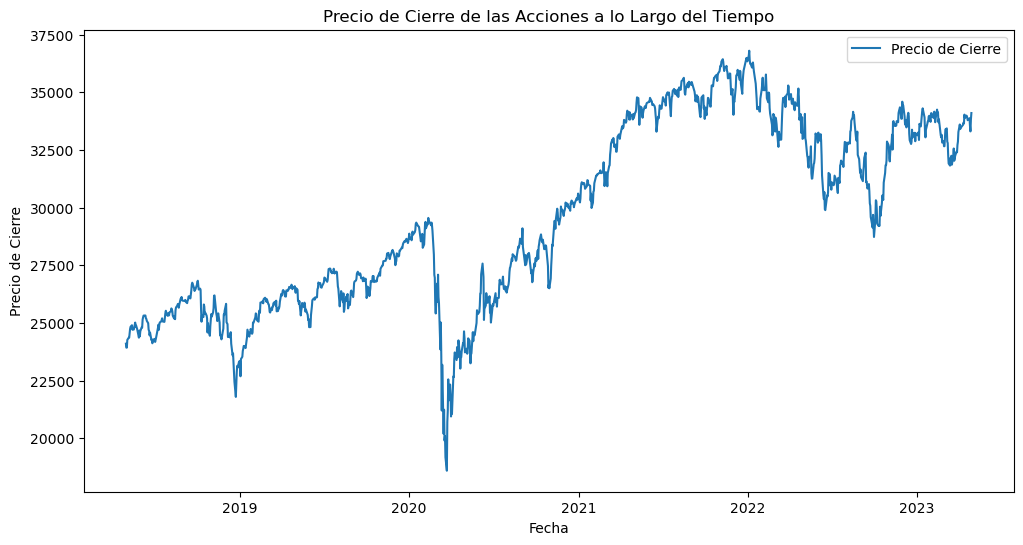

In [11]:
# Conversión de la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Visualización de la serie temporal del precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close*'], label='Precio de Cierre')
plt.title('Precio de Cierre de las Acciones a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


Resulta realmente interesante analizar la tendencia de los datos con respecto al tiempo. Una representación visual puede ayudar a identificar cualquier patrón, tendencia o estacionalidad en los datos. 

## Análisis de la sertie temporal

La gráfica obtenida muestra el precio de cierre de las acciones a lo largo del tiempo, desde 2018 hasta el 2023. En esta representación se pueden observar los siguientes patrones:

La gráfica muestra una tendencia general al alaza en los precios de las acciones desde 2018 hasta 2023 a pesar de sufrir fluctuaciones a corto plazo.

Por otro lado, se observan periodos con una alta volatilidad, especialmente notables alrededor del primer trimestre del 2020 (coincidiendo con el inicio de la pandemia de COVID-19). Este periodo, si bien muestra una caida abrupta, también presenta una recuperación iogualmente rápida en los precios de las acciones.

Las subidas y bajadas periódicas de los precios de las acciones pueden deberse a numerosos motivos, generalmente, vienen asociados a factores econñomicos, anuncions corporativos o cambios en la política monetaria.

Después de la caida pronunciada del 2020, los rpecios de las acciones se recuperan y alcanzan nuevos máximos entre finales del 2021 y principios del 2022.

Esos periodos en los que se aprecian caidas significativas de los precios antes de continuar con su tendencia al alza, dejan ver que se produjeron en esas fechas correcciones de mercado.

Para el siguiente paso, se van a visualizar y analizar el mapa de correlaciones de las variables numéricas así como las distribucioines.

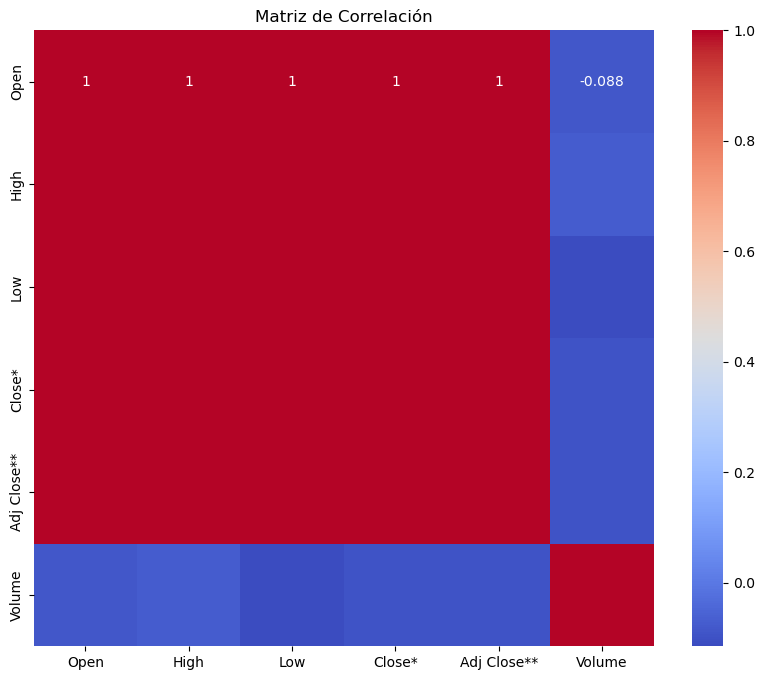

In [12]:
# Mapa de calor de correlaciones
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Analizando el mapa de correlaciones, vemos lo siguiente:

- Las variables Open, High, Low, Close*, y Adj Close** tienen una correlación perfecta de 1.0 entre sí.

Esto indica que estas variables están altamente relacionadas y esencialmente contienen la misma información en este contexto.

Es posible que estas columnas sean versiones diferentes de la misma medida de precio o que estén demasiado correlacionadas debido a cómo se ha registrado el dataset.

- La variable Volume muestra una baja correlación con las variables de precios (Open, High, Low, Close*, Adj Close**), con valores cercanos a 0.

Esto sugiere que el volumen de acciones negociadas no tiene una relación lineal fuerte con los precios de las acciones en este dataset.

Analizando estos resultados, dado que Open, High, Low, Close*, y Adj Close** están perfectamente correlacionados, se puede considerar usar solo una de estas variables en elmodelo para evitar redundancias. Además, Adj Close** se utiliza para análisis ya que está ajustado por dividendos y splits.

A pesar de su baja correlación lineal con los precios, el volumen aún puede ser una variable importante. Puede tener relaciones no lineales con el precio que los modelos de machine learning pueden capturar.

Ahora, se analizarán las distribuciones de todas las columnas.

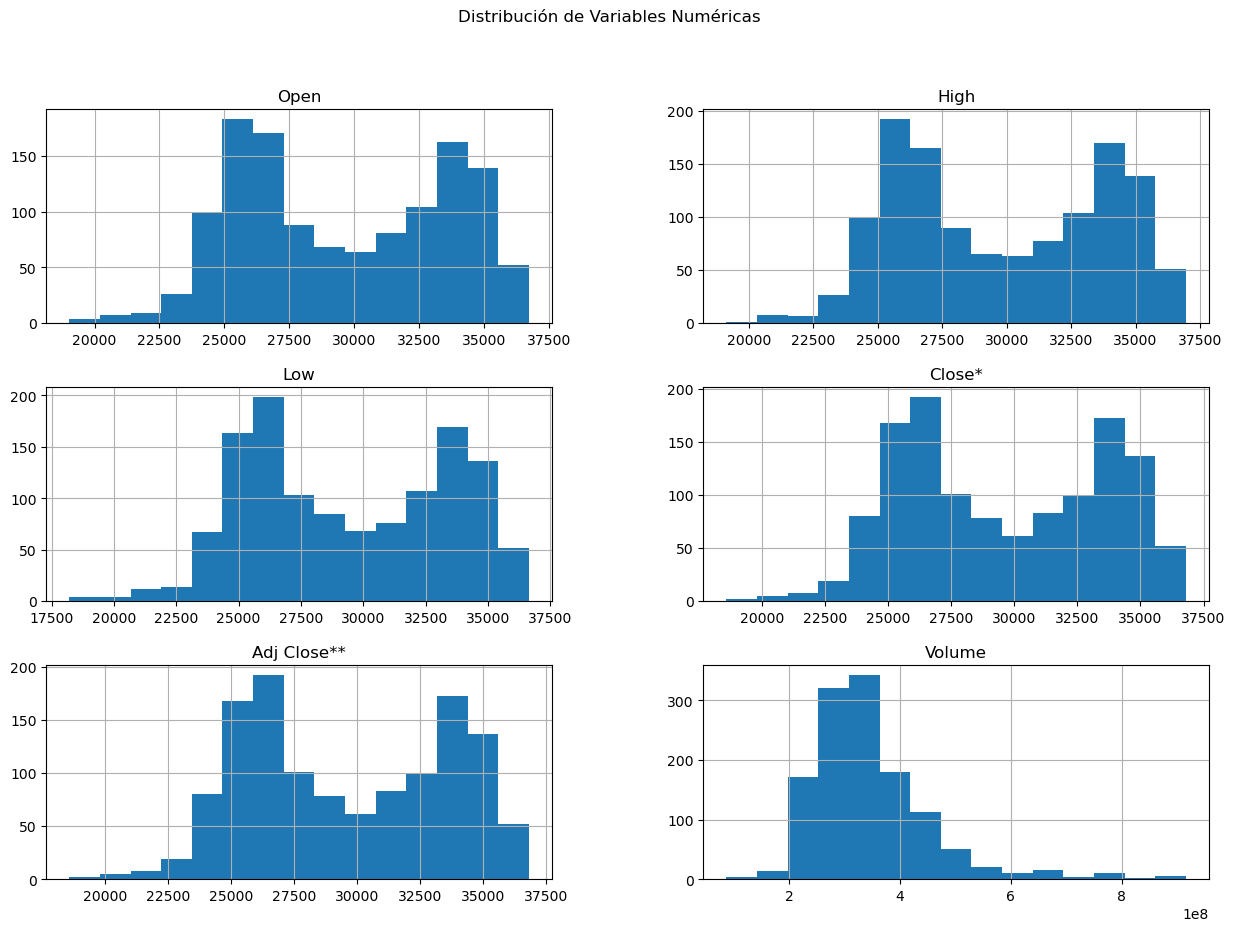

In [13]:
# Histograma de columnas numéricas
df_numeric.hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


## Análisis de las distribuciones de las variables numéricas

Analizando los histrogramas obtenidos de las variables numéricas se ve lo siguiente:

- Todas las distribuciones de precios muestran patrones bimodales, lo que indica que hay dos rangos de precios dominantes en los datos.

Esto puede reflejar diferentes periodos en el tiempo (por ejemplo, antes y después de un evento significativo como la pandemia de COVID-19) donde los precios de las acciones se agruparon alrededor de dos niveles distintos.

La similitud entre las distribuciones de Open, High, Low, Close* y Adj Close** confirma la alta correlación observada anteriormente. Estas variables están muy relacionadas y contienen información similar.

- La distribución del volumen muestra un sesgo positivo, con un mayor número de días con volúmenes de negociación más bajos.

Esto sugiere que hay más días con un volumen de negociación relativamente bajo en comparación con los días de alto volumen.

### Selección de características

Debido a la alta correlación entre las variables de precios, podemos seleccionar una sola variable para representar el precio en nuestro modelo. Adj Close** es una opción adecuada porque está ajustado por dividendos y splits.

Se mantendrá 'Volume' como una característica adicional.

Pero antes de continuar, dado el rango amplio de valores en las distribuciones, es importante normalizar los datos para mejorar el rendimiento de los modelos de machine learning.

In [14]:
# Selección de las características relevantes y creación de una copia
df_selected = df[['Adj Close**', 'Volume']].copy()

# Renombrar la columna 'Adj Close**' a 'Adj_Close' para facilitar el manejo
df_selected.rename(columns={'Adj Close**': 'Adj_Close'}, inplace=True)


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Aplicar el scaler a las características seleccionadas
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)

print(df_scaled.head())


            Adj_Close    Volume
Date                           
2023-04-28   0.851629  0.323147
2023-04-27   0.836691  0.309807
2023-04-26   0.807896  0.283211
2023-04-25   0.820471  0.255146
2023-04-24   0.839395  0.199882


Como se puede comprobar, los datos han sido correctamente normalizados y ahora se tiene el DataFrane 'df_scaled' que contie ne las características 'Adj_Close' y 'Volume' escaladas entre 0 y 1.

El siguiente paso será dividir los datos en conjuntos de entrenamiento y prueba para alimentar al modelo. Hecho esto, se guardarán los conjuntos y se realizará el diseño, entrenamiento y validación del modelo en un código aparte para facilitar su ejecución y hacer las partes independientes.

In [18]:
from sklearn.model_selection import train_test_split

# Obtener la ruta del directorio actual
current_directory = os.getcwd()

# Definir las características (X) y la variable objetivo (y)
X = df_scaled[['Volume']]
y = df_scaled['Adj_Close']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


# Definir las rutas completas para los archivos CSV
X_train_path = os.path.join(current_directory, 'X_train.csv')
X_test_path = os.path.join(current_directory, 'X_test.csv')
y_train_path = os.path.join(current_directory, 'y_train.csv')
y_test_path = os.path.join(current_directory, 'y_test.csv')

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
X_train.to_csv('X_train.csv', index=True)
X_test.to_csv('X_test.csv', index=True)
y_train.to_csv('y_train.csv', index=True)
y_test.to_csv('y_test.csv', index=True)


Tamaño del conjunto de entrenamiento: (1006, 1)
Tamaño del conjunto de prueba: (252, 1)


Como se peude ver, se ha aislado el 20% de los datos para el test, y el 80% para prueba.